In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png")

# Classification

Agenda
1. An overview of classification
2. Dataset (heartattack_train.csv) in healthcare domain
	- data visualization, ETL (data wrangling), exploratory data analysis (correlation analysis), supervised learning (classification)
3. Decision tree
4. How to evaluate classification model
	* Confusion Matrix
	* Received Operating Characteristics & AUC score
5. Logistic regression & Logit function
6. k-Nearest Neighbour (knn)	

<img src = "images\machinelearning.gif">
<img src="images\ppt\slide2.gif">
<img src="https://nyghtowlblog.files.wordpress.com/2014/04/ml_algorithms.png?w=535&h=311">
<img src="http://scikit-learn.org/stable/_static/ml_map.png">
* http://scikit-learn.org/stable/

### Required Software
* Graphviz (We already installed this software at the beginning of semester)

### Classification vs Regression
* Regression is about finding a liner or nonliner function, which **fits** well with the dataset
* Classification is about finding a liner or nonliner function, which **separates** different classes (e.g., good/bad, yes/no, pass/fail, admission/rejection) in y value
<img src="http://ipython-books.github.io/images/ml.png">

# Health Analytics
- The application of data mining (machine learning & statistical testing) to different type of healthcare problems and datasets

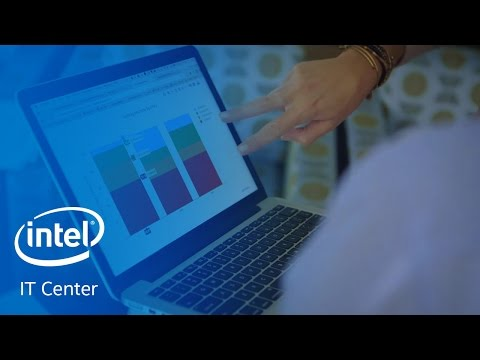

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('blQa6srwn-A')

## Can healthcare providers use data analytics to predict diseases (e.g., 2nd heart attack) and hospital readmission?

### Dataset
Source: Data Mining for the Masses by Matthew North
    
Sonia has access to the company’s medical claims database. 
With this access, she is able to generate two data sets for us. 
This first is a list of people who have suffered heart attacks, 
with an attribute indicating whether or not they have had more than one; 
and the second is a list of those who have had a first heart attack, but not a second. 
The former data set, comprised of 138 observations, will serve as our training data; while the latter, 
comprised of 690 peoples’ data, will be for scoring. 
Sonia’s hope is to help this latter group of people avoid becoming second heart attack victims. 

In compiling the two data sets we have defined the following attributes: 

* **Age**: The age in years of the person, rounded to the nearest whole year. 
* **Marital_Status**: The person’s current marital status, indicated by a coded number: **0–Single, never married; 1–Married; 2–Divorced; 3–Widowed** 
* **Gender**: The person’s gender: **0 for female; 1 for male**. 
* **Weight_Category**: The person’s weight categorized into one of three levels: **0 for normal weight range; 1 for overweight; and 2 for obese** 
* **Cholesterol**: The person’s cholesterol level, as recorded at the time of their treatment for their most recent heart attack (their only heart attack, in the case of those individuals in the scoring data set. 
* **Stress_Management**: A binary attribute indicating whether or not the person has previously attended a stress management course: **0 for no; 1 for yes**. 
* **Trait_Anxiety**: A score on a scale of **0 to 100** measuring the level of each person’s natural stress levels and abilities to cope with stress. A short time after each person in each of the two data sets had recovered from their first heart attack, they were administered a standard test of natural anxiety. Their scores are tabulated and recorded in this attribute along five point increments. A score of 0 would indicate that the person never feels anxiety, pressure or stress in any situation, while a score of 100 would indicate that the person lives in a constant state of being overwhelmed and unable to deal with his or her circumstances. 
* **2nd_Heart_Attack**: This attribute exists only in the training data set. It will be our label, the prediction or target attribute. In the training data set, the attribute is set to **‘yes’** for individuals who have suffered second heart attacks, and **‘no’** for those who have not.                  

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Loading data

In [6]:
df=pd.read_csv("data/heartattack_train.csv")
print df.head()

   Age  Marital_Status  Gender  Weight_Category  Cholesterol  \
0   60               2       0                1          150   
1   69               2       1                1          170   
2   52               1       0                0          174   
3   66               2       1                1          169   
4   70               3       0                1          237   

   Stress_Management  Trait_Anxiety 2nd_Heart_Attack  
0                  1             50              Yes  
1                  0             60              Yes  
2                  1             35               No  
3                  0             60              Yes  
4                  0             65              Yes  


In [7]:
df.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
Age                  138 non-null int64
Marital_Status       138 non-null int64
Gender               138 non-null int64
Weight_Category      138 non-null int64
Cholesterol          138 non-null int64
Stress_Management    138 non-null int64
Trait_Anxiety        138 non-null int64
2nd_Heart_Attack     138 non-null object
dtypes: int64(7), object(1)
memory usage: 8.7+ KB


# Data wrangling & ETL: Data cleaningg & transformation

In [8]:
#mappling or replacing
df = df.replace({'2nd_Heart_Attack': 'No'}, {'2nd_Heart_Attack': '0'})
df = df.replace({'2nd_Heart_Attack': 'Yes'}, {'2nd_Heart_Attack': '1'})

In [9]:
df.info()
#2nd heart attack is still treated as object or string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
Age                  138 non-null int64
Marital_Status       138 non-null int64
Gender               138 non-null int64
Weight_Category      138 non-null int64
Cholesterol          138 non-null int64
Stress_Management    138 non-null int64
Trait_Anxiety        138 non-null int64
2nd_Heart_Attack     138 non-null object
dtypes: int64(7), object(1)
memory usage: 8.7+ KB


In [10]:
#or you can do this to convert object to number
df['2nd_Heart_Attack'] = df['2nd_Heart_Attack'].astype(int)
print df.dtypes

Age                  int64
Marital_Status       int64
Gender               int64
Weight_Category      int64
Cholesterol          int64
Stress_Management    int64
Trait_Anxiety        int64
2nd_Heart_Attack     int64
dtype: object


# Exploratory data analysis

In [11]:
# basic statistics
df.describe()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,62.978261,1.695652,0.623188,0.920290,177.391304,0.442029,55.434783,0.492754
std,7.853092,0.824875,0.486352,0.764749,32.262707,0.498437,12.373126,0.501769
min,42.000000,0.000000,0.000000,0.000000,122.000000,0.000000,35.000000,0.000000
25%,58.000000,1.000000,0.000000,0.000000,161.000000,0.000000,45.000000,0.000000
50%,63.000000,2.000000,1.000000,1.000000,172.000000,0.000000,55.000000,0.000000
75%,69.000000,2.000000,1.000000,1.750000,188.750000,1.000000,60.000000,1.000000
max,81.000000,3.000000,1.000000,2.000000,239.000000,1.000000,80.000000,1.000000


In [12]:
# correlation analysis
df.corr()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack
Age,1.000000,0.427159,0.076195,0.402007,0.395331,-0.359295,0.667169,0.499182
Marital_Status,0.427159,1.000000,-0.033225,0.065402,0.273574,-0.291773,0.238340,0.364978
Gender,0.076195,-0.033225,1.000000,0.448531,0.191354,-0.241320,0.082007,0.317746
Weight_Category,0.402007,0.065402,0.448531,1.000000,0.397702,-0.347322,0.501244,0.730832
Cholesterol,0.395331,0.273574,0.191354,0.397702,1.000000,-0.405735,0.579485,0.506531
Stress_Management,-0.359295,-0.291773,-0.241320,-0.347322,-0.405735,1.000000,-0.321362,-0.439473
Trait_Anxiety,0.667169,0.238340,0.082007,0.501244,0.579485,-0.321362,1.000000,0.482548
2nd_Heart_Attack,0.499182,0.364978,0.317746,0.730832,0.506531,-0.439473,0.482548,1.000000


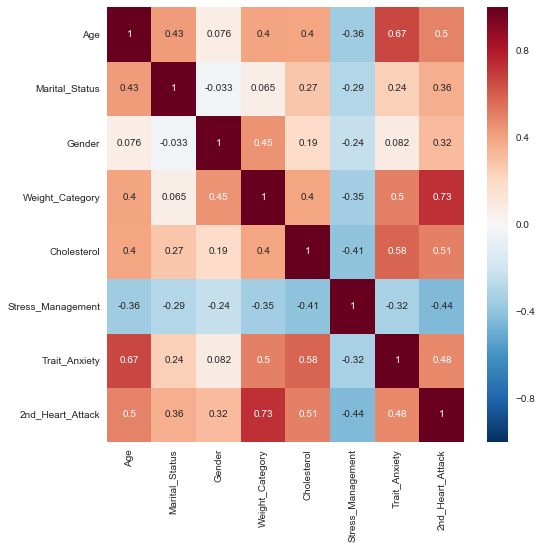

In [13]:
# heatmap for correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

# Data visualization & business intelligence
I skip this step to focus on model building. In a real-world project, you should extract business intelligence using data visualization (e.g., groupby, matplotlib, seaborn)


# Model Building (Predictive/Classification analytics)

# Top 10 algorithms & methods used by Data Scientists.

<img src="images/top10algorithms.png">
source: kdnuggets.com

There are many different machine learning algorithms for predictive model building. 

> - **Decision Tree**
> - **Logistic Regression**
> - **k-nearest neighbors**

<h1 align="center">Decision Tree</h1>
* Most intuitive
* Implicitly perform feature selection (selecting which X variables are important)
* Requires little effort from users for data preparation (can handle missing values)
* Easy to interpret and explain to executives!
* Provides decision rules

> Let's consider an example:
<img src="images\dt1.gif">
Here is the decision tree
<img src="images\dt2.gif">
Let's consider another example:
<img src="images\dt3.gif">
How about this split?
<img src="images\dt4.gif">

> Here is the decision tree: Each box is called **"a leaf node"**
<img src="images\dt5.gif">

> Then, **decision rules** are:
> * If Enlish score >= 80 then, "pass"
> * Elseif Math score >= 75 then, "pass"
> * Else, then "fail"

> The above decision tree indicates that **English Score** is the most important X variable to consider in terms of determining who is likely to pass or fail.

# Model Building & Validation

When building a predictive model, we split the original data into two datasets: **training dataset and testing (validation) dataset**. This is called **"split validation"**, a type of **"model validation"**
- A predictive model is built using the **training dataset** and **the model quality** is assessed as the model is applied into the **testing (validation) dataset** (See Appendix for more details)

> **Two types of model validation**: 
 1. **split validation** (70% of the original data as training and the other 30% as testing dataset)
 2. **cross validation** (90% of the original data as training and the other 10% as testing dataset): This allows to test the model quality 10 times. The average value is used to measure the model performance

In [14]:
# declare X variables and y variable
y = df['2nd_Heart_Attack']
x = df.drop(['2nd_Heart_Attack'], axis=1)



In [15]:
# evaluate the model by splitting into train (70%) and test sets (30%)
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# name your model as "dt"
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.334, random_state= 2)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [16]:
print x_train.shape, y_train.shape

(91, 7) (91,)


In [17]:
print x_test.shape, y_test.shape

(47, 7) (47,)


In [18]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html

print metrics.accuracy_score(y_test, dt.predict(x_test))
print metrics.confusion_matrix(y_test, dt.predict(x_test))









# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.

0.936170212766
[[16  2]
 [ 1 28]]


> **So, what is the model accuracy?**
- The decision tree model is 92.9% accurate. Therefore, we expect that the model will be about **93% accurate** when the model is applied into a real-world situation

<img src="images\ppt\slide17.gif">
<img src="images\ppt\slide18.gif">

http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

- Precision = true positives / (true positives + false positives) 
    - The ability of the classifier to not label a negative sample as positive
- Recall = true positives / (true positives + false negatives). 
    - The ability of the classifier to find all positive samples
- f1  = (precision $*$ recall) / (precision + recall)

- confusion matrix: rows are the actual values; columns are the predicted value

- 100% accuracy ... this seems to be overfitting (too good to be true)

# Visualizing decision tree

There are two methods for this. You can use either method. 

- The first option is using Graphviz software. For this option, you need to have GraphViz installed in your mahcine.
- The second option is using **pydotplus**. This creates a pdf file. 
    - for this, install pydotplus first **pip install pydotplus**

In [39]:
!pip install pydotplus

    100% |████████████████████████████████| 286kB 1.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for pydotplus ... done
  Stored in directory: /Users/linlyn/Library/Caches/pip/wheels/43/31/48/e1d60511537b50a8ec28b130566d2fbbe4ac302b0def4baa48
Successfully built pydotplus


In [20]:
# 1st option
tree.export_graphviz(dt, out_file='data/decisiontree.dot', feature_names=x.columns)

In [21]:
from IPython.display import Image
Image("data/decisiontree.png")
# This is a "full-grown" tree 

# Interpreting decision tree

Weight_category appears to be the single most influential factor

Many decision rules can be extracted. For example:

1. if weight_category < 0.5 (meaning normal), 31 people (who in normal weight category) do not have 2nd heart attack.
2. if weight_category > 0.5 (meaning overweight or obese) and Marital_status < 1.5 (meaning single or married) and Trait_Anxiety < 62.5 (meaning low anxiety level), people tend NOT to have 2nd heart attack. 17 people are in this category.
3. develop more decision rules here ...

In [40]:
!pip install pydotplus

In [42]:
# 2nd option
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=x.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt.pdf")
# go to data folder and open the pdf file

InvocationException: GraphViz's executables not found

# What if your decision tree looks too complicated to be practical?
- A "full-grown" decision tree could be too complicated to be practical
- To be useful, a model needs to be simple, but not too simple
- **"Everything Should Be Made as Simple as Possible, But Not Simpler"** - Albert Einstein or ?

In [ ]:
# Build a decision model with max_depth 4 and min_samples_leaf 5







In [ ]:
# Find out the performance of this model & interpret the results








In [ ]:
# Visualize the simpler decision tree model (dt_simple)





# Embed the decision tree here






# Model Deployement: Make Predictions on the new dataset (scoring dataset)

In [23]:
# scoring dataset
score=pd.read_csv("data/heartattack_Scoring.csv")
score.head(2)
#no Y value in this dataset ... 
#we are trying to predict whether the people in this scoring dataset are likely to have 2nd heart attack or not.

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety
0,61,0,1,1,139,1,50
1,55,2,1,2,163,0,40


In [24]:
predictedY = dt.predict(score)
print predictedY

[0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1
 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1
 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1
 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0
 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0
 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0
 1 1 1 0 0 1 0 1 0 1 1 0 

In [25]:
#combine the predicted Y value with the scoring dataset
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head()

,predicted Y
0,0
1,1
2,0
3,1
4,1


In [26]:
#finally ...
data1 = score.join(predictedY) 
data1.head()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,predicted Y
0,61,0,1,1,139,1,50,0
1,55,2,1,2,163,0,40,1
2,53,1,1,1,172,0,55,0
3,58,1,1,2,206,0,70,1
4,62,2,1,1,148,1,50,1


2nd person (a 55 years old male) is likely to have 2nd heart attack

# Appendix 1: 10 fold cross validation

We have used split validataion (training set and testing set) to build predictive models and test their quality. There is another option called 10 folder cross validation.

### Split validation
* X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
* 70% of the data for “training” (or building) a supervised learning model and 30% of the data for “testing” the quality of the model

* Let's consider an exmple
    * X value = Size ; y value = Price 
<img src="http://www.holehouse.org/mlclass/10_Advice_for_applying_machine_learning_files/Image%20[1].png">

### Cross validation (CV) or 10-fold CV
* The basic idea is that, rather than testing the model quality **only once**, cross validation (or 10-fold CV) tests the model **10 times** with 10 different testing datasets.
#### How?
* The training (or original) dataset is randomly partitioned into 10 equal sized subsamples (see the figure below). 
* At each time, one subsample is set aside as the **testing** or **validation dataset** and the other 9 subsamples are used as the training dataset. 
* A model is built using the training dataset and tested with the testing dataset. This is done 10 times. 
* This leads to 10 evaluation scores (mean squared error). The final score is based on the average of the scores.

<img src="https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png">

In [28]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(dt, x, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.92857143  0.85714286  1.          1.          0.78571429  0.92857143
  0.92857143  0.92857143  1.          1.        ]
0.935714285714


# Appendix 2. Model building, evaluation and model selection/deployment in machine learning

In [29]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part1/testing.png")

# Appendix 3: Random Forest (Ensemble model): Very Important !!!
- This is like **getting opionions from multiple doctors**, not one doctor, for medical diagnosis
- Building **multiple decision trees (ensembled decision trees) with the purpose to improve the model accuracy**
- **RandomForestClassifier**(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0)
    - n_estimators = the number of **decision trees** in the forest 
- **Combining different opionions is likely to lead to high accuracy**. 
- The winners of some recent industry data anlytics competitions (e.g., Kaggle.com) happened to use **random forest**. A recent paper "[(Do We Need Hundreds of Classifiers to Solve Real World Classification Problems?)](http://jmlr.csail.mit.edu/papers/volume15/delgado14a/delgado14a.pdf)" published in the Journal of Machine Learning Research shows:

> **Ensembled decision tree (Random Forest) performs the best for most classification problems.**

- "blackbox" algorithm

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(x, y)
clf.score(x,y)

0.99275362318840576

In [33]:
# generate evaluation metrics
print metrics.accuracy_score(y, clf.predict(x)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(x))
print metrics.classification_report(y, clf.predict(x))

0.992753623188
[[70  0]
 [ 1 67]]
             precision    recall  f1-score   support

          0       0.99      1.00      0.99        70
          1       1.00      0.99      0.99        68

avg / total       0.99      0.99      0.99       138



In [35]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), x.columns))

Features sorted by their rank:
[(0.0251, 'Gender'), (0.0418, 'Stress_Management'), (0.1233, 'Age'), (0.1346, 'Trait_Anxiety'), (0.1737, 'Marital_Status'), (0.1979, 'Cholesterol'), (0.3037, 'Weight_Category')]


Weight_Category appears to be an important predictor

In [36]:
# another method
pd.DataFrame({'feature':x.columns, 'importance':clf.feature_importances_})

,feature,importance
0,Age,0.123287
1,Marital_Status,0.173651
2,Gender,0.025057
3,Weight_Category,0.303651
4,Cholesterol,0.197914
5,Stress_Management,0.041819
6,Trait_Anxiety,0.134621


In [38]:
#Predict class probabilities for X
clf.predict_proba(x)
# 1st value: the probability of NO
# 2nd value: the probability of YES (2nd heart attack)

array([[ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 0.05,  0.95],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.55,  0.45],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.1 ,  0.9 ],
       [ 0.  ,  1.  ],
       [ 0.05,  0.95],
       [ 0.  ,  1.  ],
       [ 0.05,  0.95],
       [ 1.  ,  0.  ],
       [ 0.95,  0.05],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 0.3 ,  0.7 ],
       [ 0.05,  0.95],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.95,  0.05],
       [ 0.

### Make predictions on the new dataset (scoring dataset without y value)

In [ ]:
score=pd.read_csv("data/heartattack_scoring.csv")
output_scoring = clf.predict(score)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted 2nd Heart Attack'])

probs = clf.predict_proba(score)
probs = pd.DataFrame(probs, columns=['prob of NO', 'prob of YES'])

risky_patients = predicted_y.join(probs)

risky_patients.to_csv("data/output_heartattack_RandomForest_ScoringDataset.csv")

# Appendix 4: Model Evaluation with Receiver Operating Characteristic (ROC)
* In addition to confusion matrix, this is another method to evaluate classifier output quality
* True positive rate on the Y axis and false positive rate on the X axis (the top left corner of the plot is “ideal point”)
* The steeper the curve is, the better the classifier quality is
* In general, high quality model leads to a steeper curve

# ROC

- TPR on the Y axis
- FPR on the X axis
- High TPR --> High model accuracy
- High FPR --> Poor model accuracy
- Therefore, a steeper curve indicates a good model performance

# Examples
<img src = "http://gim.unmc.edu/dxtests/roccomp.jpg">

In [1]:
y = df['2nd_Heart_Attack']
X = df.drop(['2nd_Heart_Attack'], axis=1)

# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#This is ROC chart based on the testing dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test,dt.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, dt.predict(X_test))

NameError: name 'df' is not defined

- **Yes. ROC chart shows that 5% FPR & 91.3% TPR**
- **And, AUC is 0.93**

In [ ]:
# Generate ROC chart using your second (simple) decision tree model













